In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [61]:
df=pd.read_csv('adult.csv')

In [62]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
np.unique(df['sex'])

array([' Female', ' Male'], dtype=object)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [6]:
df=df.replace('?',np.nan)
df=df.replace(' ?',np.nan)


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [10]:
numerical_features=[x for x in df.columns if df[x].dtype!='O']
cat_features=[x for x in df.columns if df[x].dtype=='O']

In [11]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [12]:
numerical_features.remove('fnlwgt')

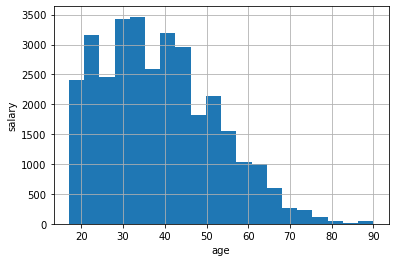

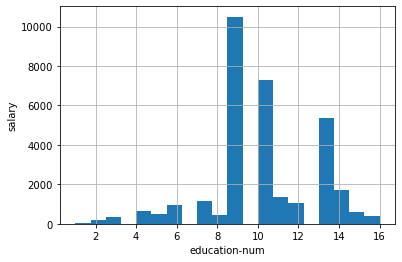

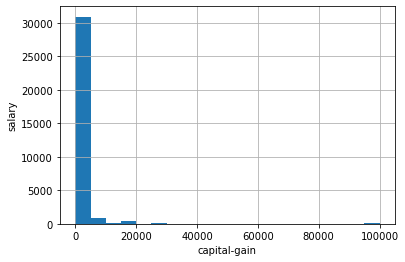

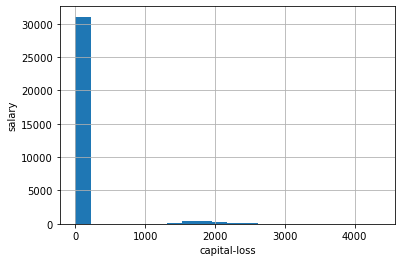

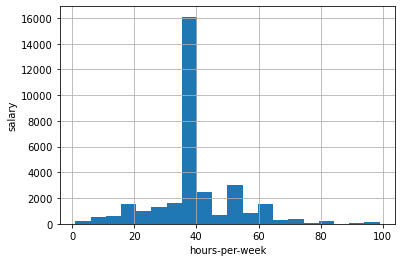

In [13]:
for feature in numerical_features:
    df2=df.copy()
    df2[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('salary')
    plt.show()

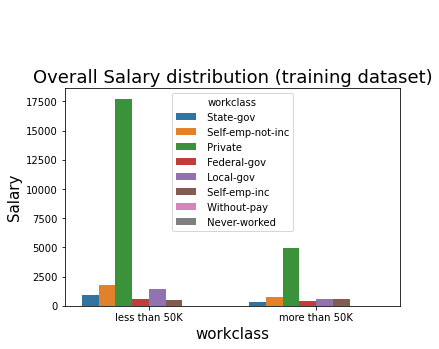

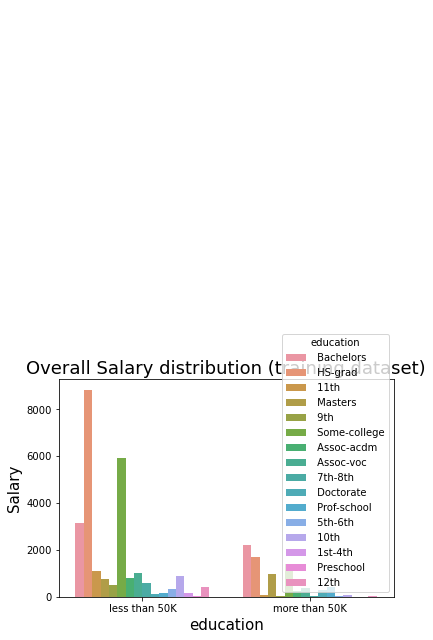

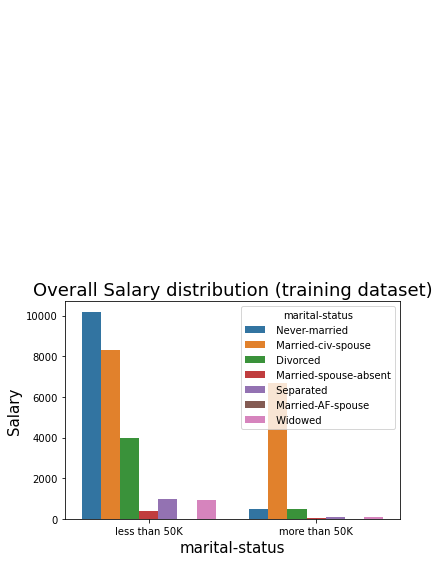

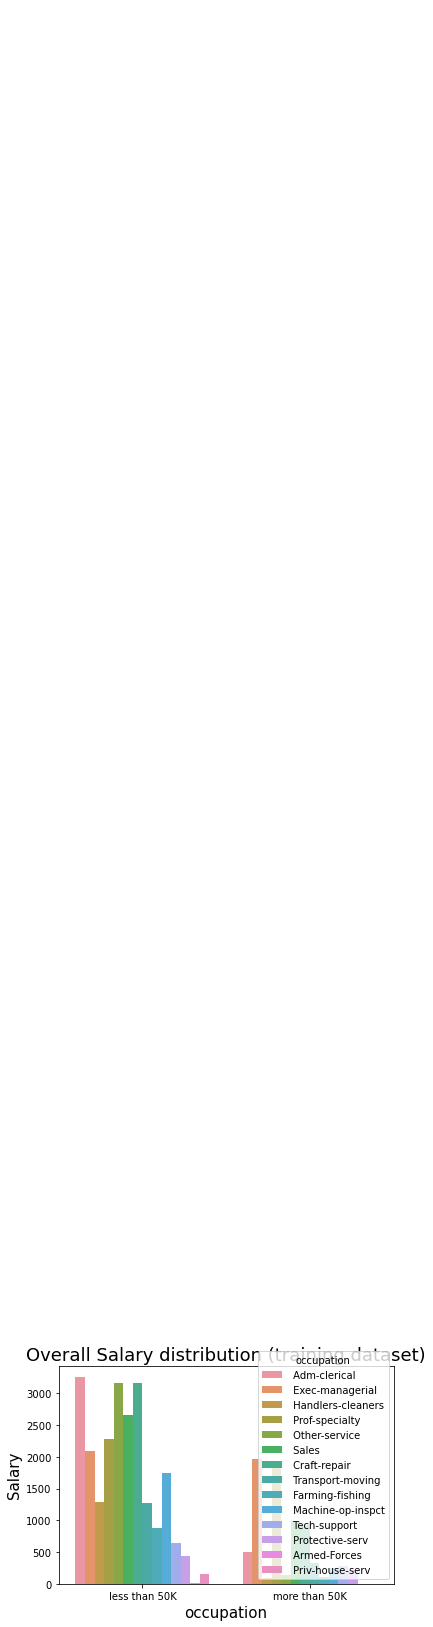

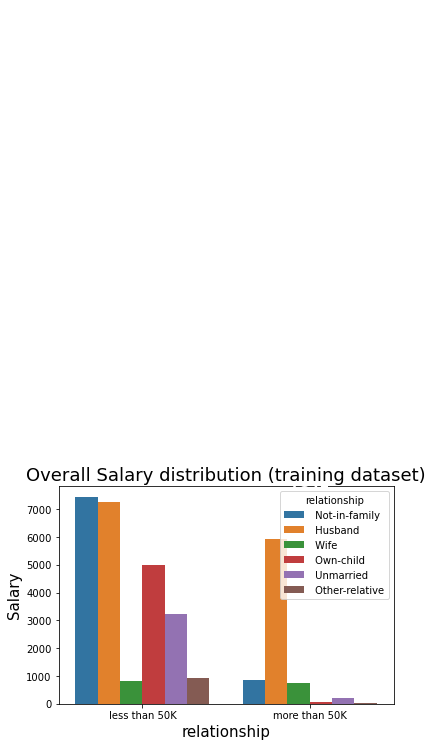

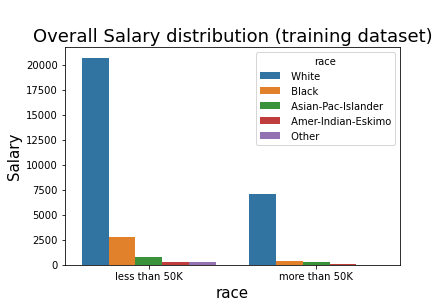

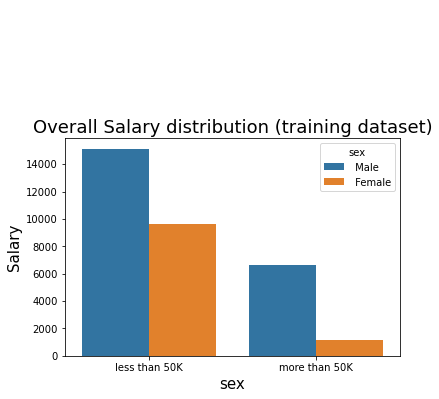

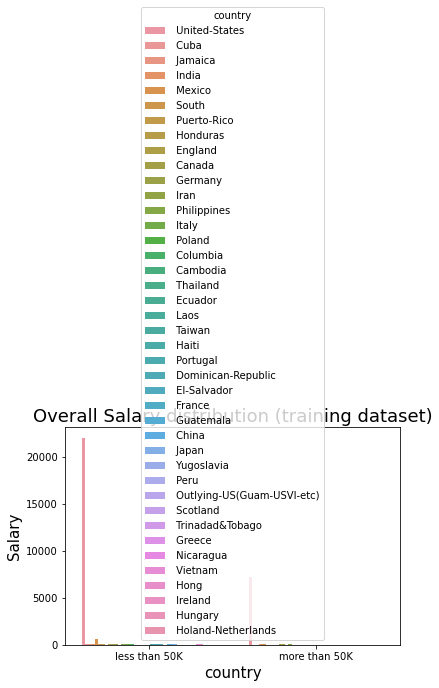

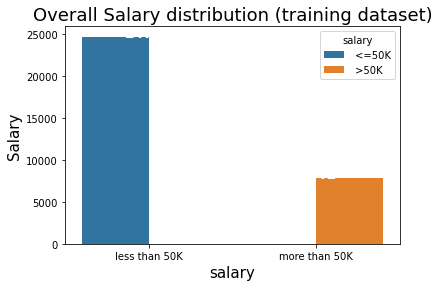

In [14]:
for x in cat_features:
    sns.countplot(x='salary',hue=x,data=df)
    plt.xticks( np.arange(2), ['less than 50K', 'more than 50K'] )
    plt.title('Overall Salary distribution (training dataset)',fontsize= 18)
    # set x label
    plt.xlabel(x,fontsize = 15)
    # set y label
    plt.ylabel('Salary',fontsize = 15)
    labels = (df['salary'].value_counts())
    for i, v in enumerate(labels):
        plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
    plt.show()

In [15]:
np.unique(df['salary'])

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df['salary'].replace(" <=50K",0,inplace=True)
df['salary'].replace( ' >50K',1,inplace=True)

In [17]:
df['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [18]:
null_features=[x for x in df.columns if df[x].isnull().sum()>0]

In [19]:
null_features

['workclass', 'occupation', 'country']

In [20]:
np.unique(df['education-num'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [21]:
np.unique(df['education'])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [22]:
len(np.unique(df['education']))==len(np.unique(df['education']))

True

In [23]:
res = {df['education'][i]: df['education-num'][i] for i in range(len(df['education']))}

In [24]:
res

{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' 1st-4th': 2,
 ' Preschool': 1,
 ' 12th': 8}

In [25]:
df=df.drop(['education'],axis=1)

In [26]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [27]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass1']=le.fit_transform(df['workclass'])



In [29]:
df['country1']=le.fit_transform(df['country'])

In [30]:
cat_features.remove('workclass')
cat_features.remove('country')
cat_features.remove('salary')

In [31]:
cat_features.remove('education')

In [32]:
for x in cat_features:
    df[x+"1"]=le.fit_transform(df[x])

In [33]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass1,country1,marital-status1,occupation1,relationship1,race1,sex1
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,6,38,4,0,1,4,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,5,38,2,3,0,4,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,3,38,0,5,1,4,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,3,38,2,5,0,2,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,3,4,2,9,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,3,38,2,12,5,4,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,3,38,2,6,0,4,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,3,38,6,0,4,4,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,3,38,4,0,3,4,1


In [34]:
df=df.drop(cat_features,axis=1)

In [35]:
df

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,country,salary,workclass1,country1,marital-status1,occupation1,relationship1,race1,sex1
0,39,State-gov,13,2174,0,40,United-States,0,6,38,4,0,1,4,1
1,50,Self-emp-not-inc,13,0,0,13,United-States,0,5,38,2,3,0,4,1
2,38,Private,9,0,0,40,United-States,0,3,38,0,5,1,4,1
3,53,Private,7,0,0,40,United-States,0,3,38,2,5,0,2,1
4,28,Private,13,0,0,40,Cuba,0,3,4,2,9,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,0,0,38,United-States,0,3,38,2,12,5,4,0
32557,40,Private,9,0,0,40,United-States,1,3,38,2,6,0,4,1
32558,58,Private,9,0,0,40,United-States,0,3,38,6,0,4,4,0
32559,22,Private,9,0,0,20,United-States,0,3,38,4,0,3,4,1


In [36]:
df.drop(['workclass','country'],axis=1,inplace=True)

In [37]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass1,country1,marital-status1,occupation1,relationship1,race1,sex1
0,39,13,2174,0,40,0,6,38,4,0,1,4,1
1,50,13,0,0,13,0,5,38,2,3,0,4,1
2,38,9,0,0,40,0,3,38,0,5,1,4,1
3,53,7,0,0,40,0,3,38,2,5,0,2,1
4,28,13,0,0,40,0,3,4,2,9,5,2,0


<AxesSubplot:>

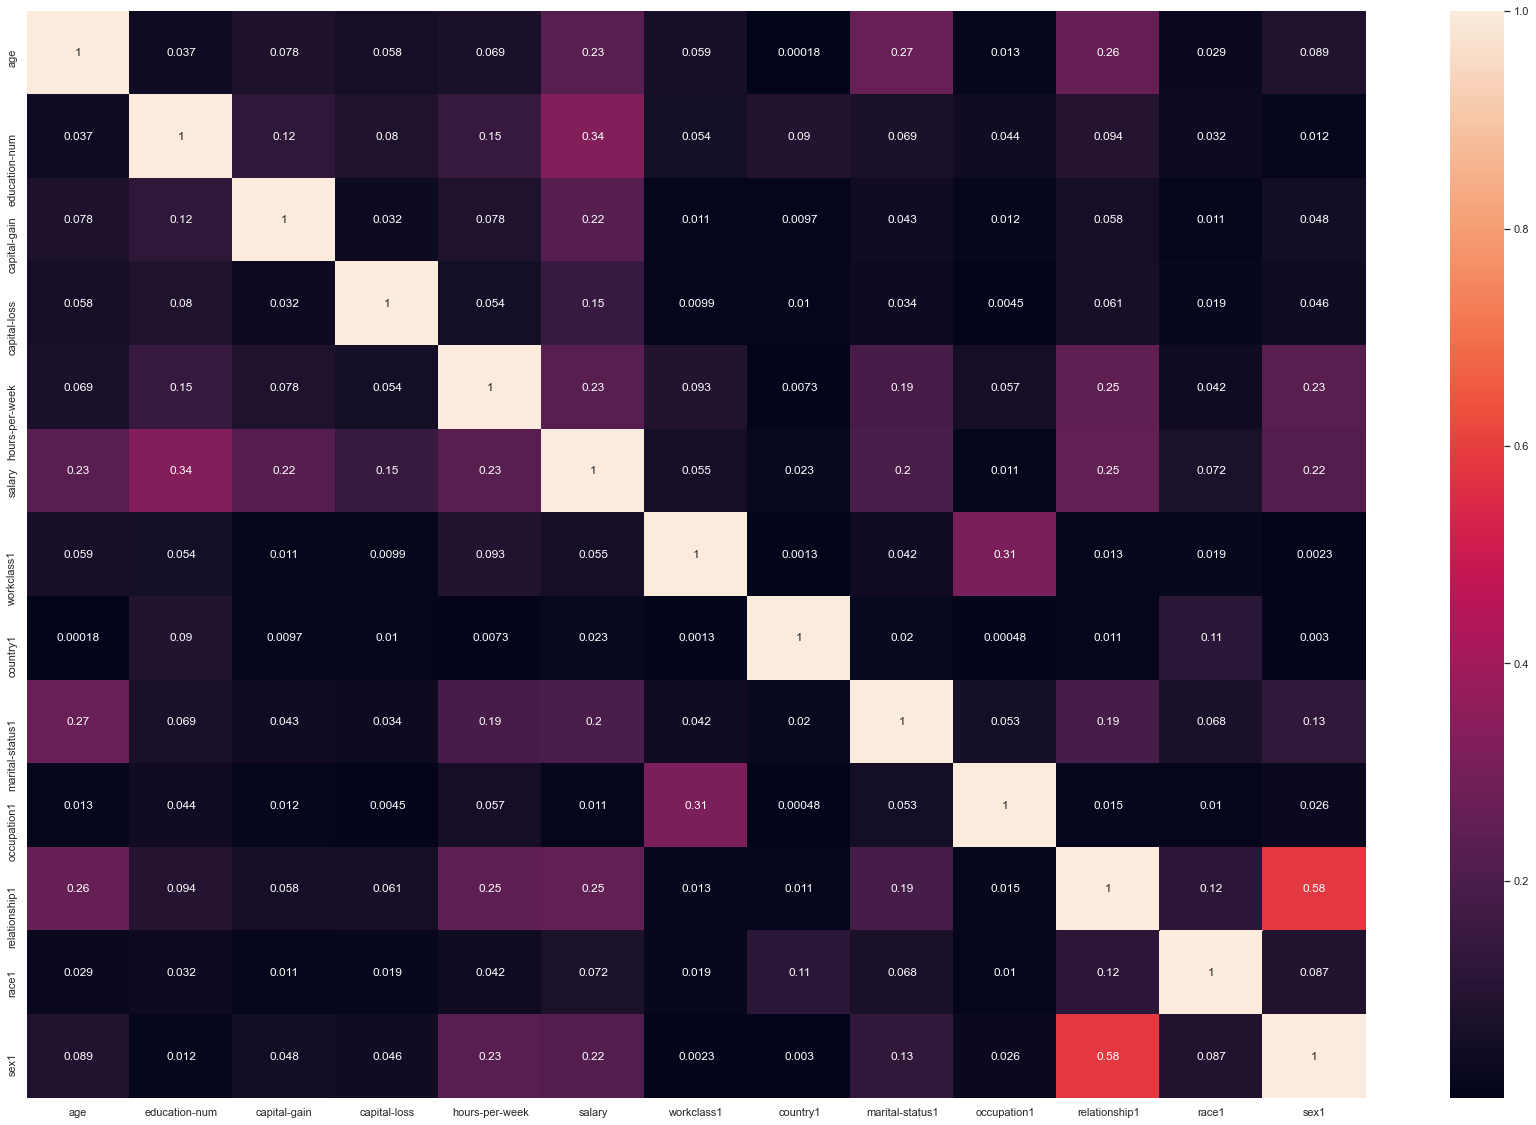

In [39]:
corr=df.corr()
corr=abs(corr)
sns.set(rc={'figure.figsize':(30,20)})
hm=sns.heatmap(corr,annot=True)
hm

In [40]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass1,country1,marital-status1,occupation1,relationship1,race1,sex1
0,39,13,2174,0,40,0,6,38,4,0,1,4,1
1,50,13,0,0,13,0,5,38,2,3,0,4,1
2,38,9,0,0,40,0,3,38,0,5,1,4,1
3,53,7,0,0,40,0,3,38,2,5,0,2,1
4,28,13,0,0,40,0,3,4,2,9,5,2,0


In [41]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [46]:
np.unique(df['marital-status1'])

array([0, 1, 2, 3, 4, 5, 6])

In [48]:
array=np.loadtxt('sample.txt',delimiter=', ')

In [58]:
df=df.drop(['education'],axis=1)

In [59]:
len(df.columns)

11

In [60]:
df2=pd.DataFrame(np.round(array),columns=df.columns)

ValueError: Shape of passed values is (32561, 12), indices imply (32561, 11)

In [56]:
df2

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39.0,13.0,2174.0,0.0,40.0,0.0,7.0,4.0,1.0,1.0,4.0,39.0
1,50.0,13.0,0.0,0.0,13.0,0.0,6.0,2.0,4.0,0.0,4.0,39.0
2,38.0,9.0,0.0,0.0,40.0,0.0,4.0,0.0,6.0,1.0,4.0,39.0
3,53.0,7.0,0.0,0.0,40.0,0.0,4.0,2.0,6.0,0.0,2.0,39.0
4,28.0,13.0,0.0,0.0,40.0,0.0,4.0,2.0,10.0,5.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,12.0,0.0,0.0,38.0,0.0,4.0,2.0,13.0,5.0,4.0,39.0
32557,40.0,9.0,0.0,0.0,40.0,1.0,4.0,2.0,7.0,0.0,4.0,39.0
32558,58.0,9.0,0.0,0.0,40.0,0.0,4.0,6.0,1.0,4.0,4.0,39.0
32559,22.0,9.0,0.0,0.0,20.0,0.0,4.0,4.0,1.0,3.0,4.0,39.0
